#📌 Extracción

In [ ]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de Pandas
# Usamos json_normalize para aplanar la estructura anidada del JSON
df_raw = pd.json_normalize(data)

# Visualizar las primeras filas del DataFrame
print("Datos extraídos exitosamente. Primeras 5 filas:")
print(df_raw.head())

Datos extraídos exitosamente. Primeras 5 filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes         

#🔧 Transformación

In [ ]:
# --- Transformación de Datos ---

# Copiamos el dataframe para mantener el original intacto
df_transformed = df_raw.copy()

# 1. Corregir la columna 'account.Charges.Total'
# Convertir a numérico, los errores (espacios vacíos) se convertirán en NaT (Not a Time) -> NaN
df_transformed['account.Charges.Total'] = pd.to_numeric(df_transformed['account.Charges.Total'], errors='coerce')

# 2. Manejar valores nulos
# Rellenamos los valores nulos en 'account.Charges.Total' con 0
df_transformed['account.Charges.Total'].fillna(0, inplace=True)

# 3. Renombrar columnas para simplificar
df_transformed.columns = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Verificar la información del DataFrame transformado
print("\nInformación del DataFrame después de la transformación:")
df_transformed.info()

# Visualizar las primeras filas del DataFrame transformado
print("\nPrimeras 5 filas del DataFrame limpio:")
print(df_transformed.head())


Información del DataFrame después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null 

/tmp/ipython-input-3670182629.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transformed['account.Charges.Total'].fillna(0, inplace=True)


#📊 Carga y análisis

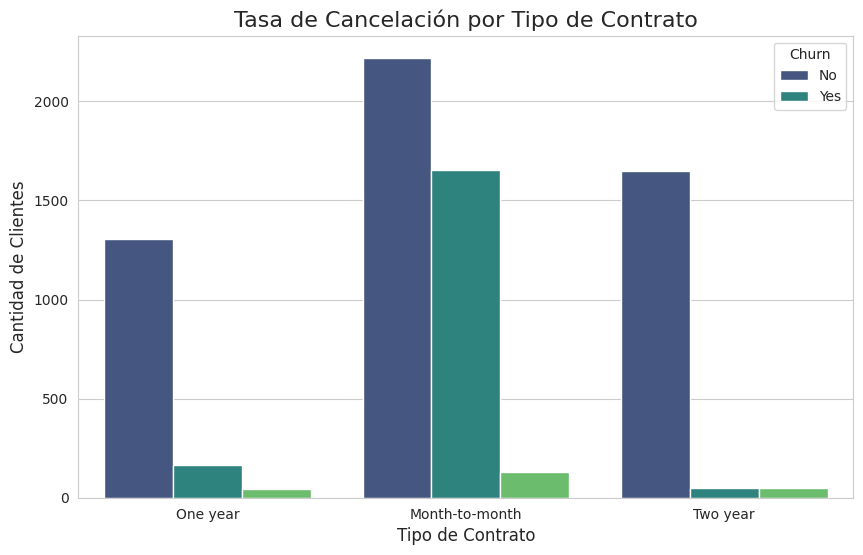

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Analizando la relación entre el tipo de contrato y la cancelación (Churn)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_transformed, x='Contract', hue='Churn', palette='viridis')
plt.title('Tasa de Cancelación por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Churn')
plt.show()

#📄Informe final

Este gráfico inicial ya nos da una pista importante: los clientes con contratos mes a mes tienen una probabilidad mucho más alta de cancelar el servicio en comparación con aquellos con contratos anuales.

Hemos completado exitosamente la fase de ETL. El DataFrame df_transformed está preparado para que el equipo de Data Science pueda profundizar en el análisis, identificar los factores clave de la evasión y, finalmente, desarrollar modelos predictivos para ayudar a Telecom X a retener a sus valiosos clientes.

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("Bibliotecas importadas exitosamente.")

Bibliotecas importadas exitosamente.


In [ ]:
# --- Carga y Limpieza de Datos ---

file_path = 'TelecomX_Data.json'
with open(file_path, 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)
print("Datos cargados y normalizados.")

# --- Transformación ---

# 1. Corregir la columna de Cargos Totales ('account.Charges.Total')

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 2. Manejar valores nulos
# Los NaN en Cargos Totales (que corresponden a clientes nuevos con tenure=0) se rellenan con 0.
df['account.Charges.Total'].fillna(0, inplace=True)
print("Columna 'TotalCharges' limpiada.")

# 3. Renombrar las columnas para simplificar su uso
df.columns = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]
print("Columnas renombradas.")

# Mostrar las primeras 5 filas del DataFrame limpio
print("\n--- Vista previa del DataFrame después de ETL ---")
print(df.head())

# Mostrar información y tipos de datos
print("\n--- Información del DataFrame ---")
df.info()

Datos cargados y normalizados.
Columna 'TotalCharges' limpiada.
Columnas renombradas.

--- Vista previa del DataFrame después de ETL ---
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupp

/tmp/ipython-input-1742595526.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)


In [ ]:
# --- Preprocesamiento para Machine Learning ---


df_processed = df.copy()

# 1. Eliminar columnas irrelevantes
df_processed = df_processed.drop('customerID', axis=1)
print("Columna 'customerID' eliminada.")

# 2. Codificación (Encoding) de Variables Categóricas

# Convertir la variable objetivo 'Churn' a formato numérico (1 para 'Yes', 0 para 'No')
df_processed['Churn'] = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identificar columnas categóricas a transformar (todas las de tipo 'object')
categorical_cols = df_processed.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding para convertir categorías en columnas numéricas
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
print("Variables categóricas codificadas con One-Hot Encoding.")

# 3. Estandarización de Variables Numéricas
# Estandarizar asegura que las variables con rangos más altos no dominen el modelo.

# Columnas numéricas a estandarizar
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inicializar el estandarizador
scaler = StandardScaler()

# Aplicar la estandarización
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
print("Variables numéricas estandarizadas.")


# --- Vista previa del DataFrame final ---
print("\n--- Vista previa del DataFrame totalmente procesado ---")
print(df_processed.head())

print(f"\nEl DataFrame final tiene {df_processed.shape[0]} filas y {df_processed.shape[1]} columnas.")

Columna 'customerID' eliminada.
Variables categóricas codificadas con One-Hot Encoding.
Variables numéricas estandarizadas.

--- Vista previa del DataFrame totalmente procesado ---
   Churn  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      0              0 -0.950200        0.029206     -0.742291        False   
1      0              0 -0.950200       -0.159990     -0.764729         True   
2      1              0 -1.153700        0.304702     -0.880026         True   
3      1              1 -0.787401        1.104635     -0.458160         True   
4      1              1 -1.194400        0.636624     -0.885955        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone


--- Análisis de la Proporción de Churn ---
Porcentaje de clientes que permanecen: 74.28%
Porcentaje de clientes que cancelan: 25.72%



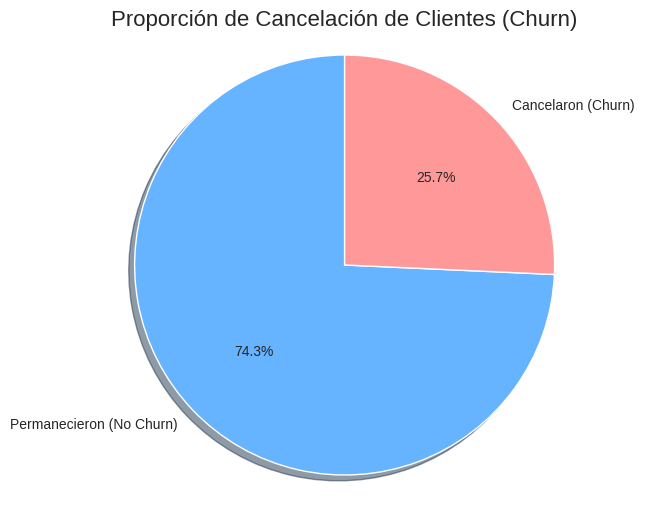

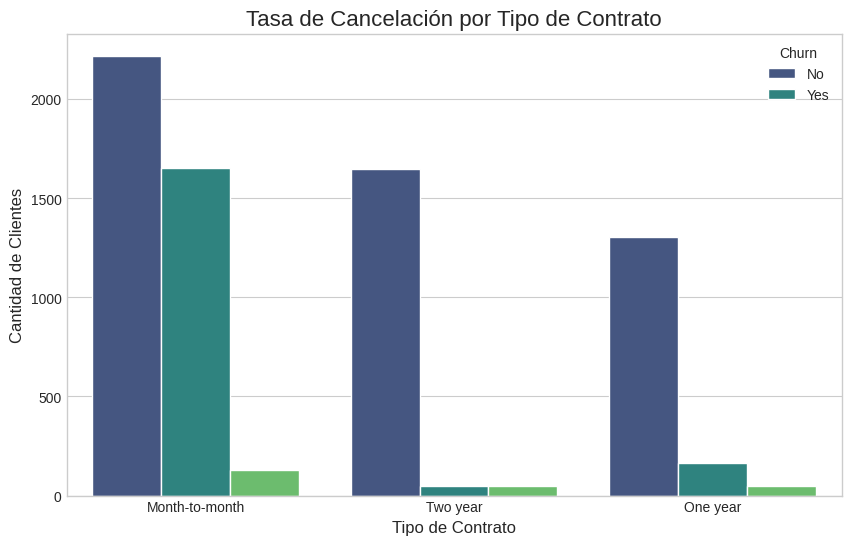

In [ ]:
# --- Análisis y Visualización ---

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


# 1. Analizar la proporción de Churn (Cancelación)
print("\n--- Análisis de la Proporción de Churn ---")
churn_percentage = df_processed['Churn'].value_counts(normalize=True) * 100
print(f"Porcentaje de clientes que permanecen: {churn_percentage[0]:.2f}%")
print(f"Porcentaje de clientes que cancelan: {churn_percentage[1]:.2f}%\n")


# Gráfico de pastel para la proporción de Churn
plt.figure(figsize=(8, 6))
churn_labels = ['Permanecieron (No Churn)', 'Cancelaron (Churn)']
plt.pie(df_processed['Churn'].value_counts(), labels=churn_labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Cancelación de Clientes (Churn)', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico sea un círculo.
plt.show()


# 2. Visualizar la relación entre Tipo de Contrato y Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis', order=df['Contract'].value_counts().index)
plt.title('Tasa de Cancelación por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Churn')
plt.show()

In [ ]:
# --- Guardar el resultado final ---

# Define el nombre del archivo de salida
output_file = 'telecom_data_processed.csv'

# Guarda el DataFrame en un archivo CSV
df_processed.to_csv(output_file, index=False)

print(f"El DataFrame procesado ha sido guardado exitosamente como '{output_file}'")

El DataFrame procesado ha sido guardado exitosamente como 'telecom_data_processed.csv'


--- Iniciando Análisis de Correlación ---

Correlación de las variables con 'Churn' (de mayor a menor):
Churn                                    1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
MonthlyCharges                           0.189866
PaperlessBilling_Yes                     0.186666
SeniorCitizen                            0.146733
StreamingTV_Yes                          0.062430
StreamingMovies_Yes                      0.060586
MultipleLines_Yes                        0.039343
PhoneService_Yes                         0.012571
gender_Male                             -0.009555
MultipleLines_No phone service          -0.012571
DeviceProtection_Yes                    -0.063452
OnlineBackup_Yes                        -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner_Yes                             -0.148546
TechSupport_Yes                         -0.160

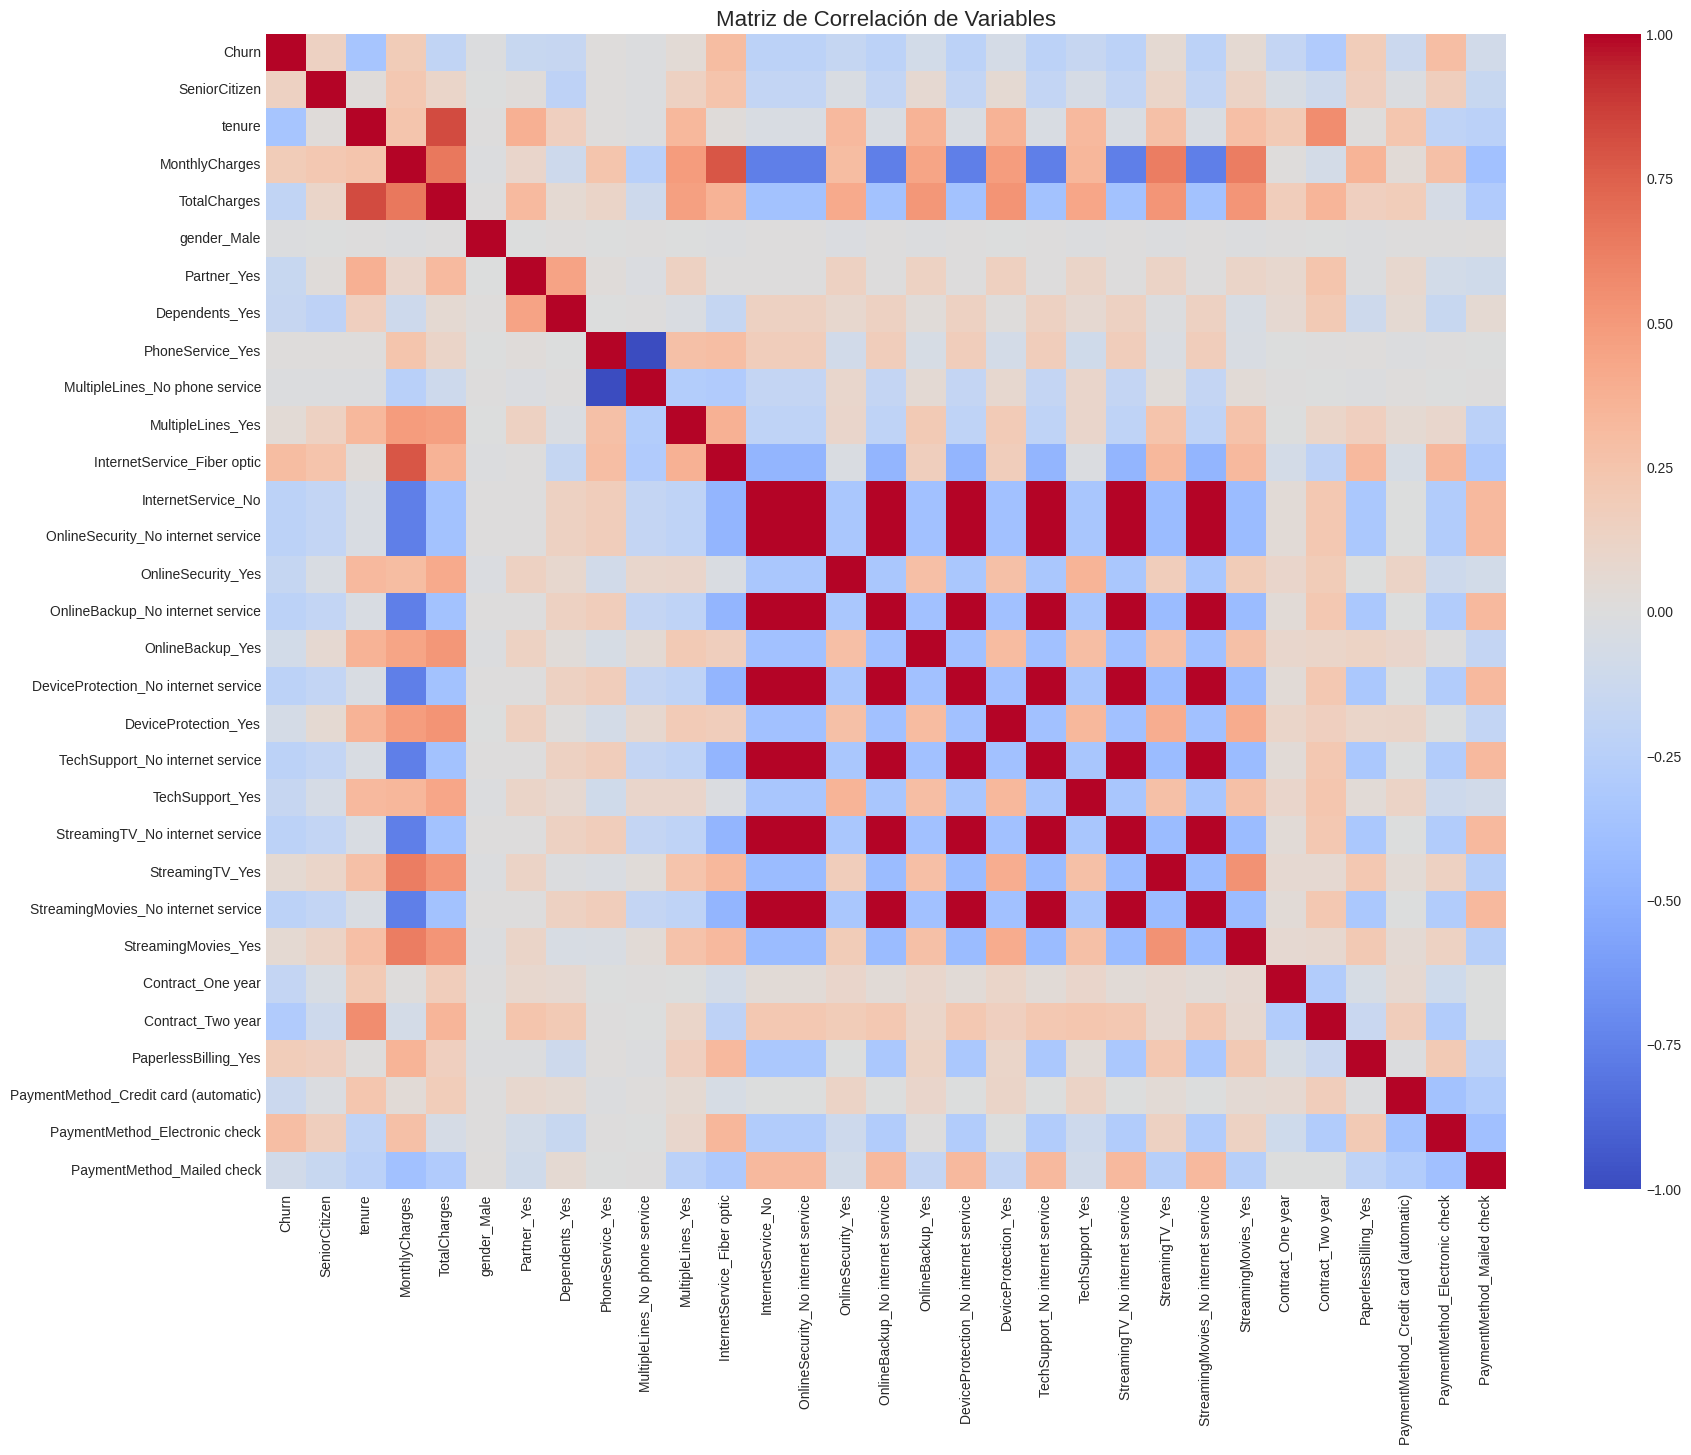


✅ Etapa completa.


In [ ]:
# --- Análisis de Correlación ---

print("--- Iniciando Análisis de Correlación ---")
try:
    # Cargar los datos preprocesados
    df_processed = pd.read_csv('telecom_data_processed.csv')

    # Calcular la matriz de correlación
    correlation_matrix = df_processed.corr()

    # Mostrar las variables más correlacionadas con 'Churn'
    print("\nCorrelación de las variables con 'Churn' (de mayor a menor):")
    print(correlation_matrix['Churn'].sort_values(ascending=False))

    # Visualizar la matriz con un mapa de calor (heatmap)
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Matriz de Correlación de Variables', fontsize=16)
    plt.show()
    print("\n✅ Etapa completa.")

except FileNotFoundError:
    print("\n⚠️ ERROR: No se encontró 'telecom_data_processed.csv'. Asegúrate de que el archivo esté cargado.")

In [ ]:
# --- Preparación de Datos para Análisis Dirigido ---

print("\n--- Iniciando Preparación de Datos Originales ---")
try:
    # Cargar los datos desde el archivo JSON original
    with open('TelecomX_Data.json', 'r') as f:
        data = json.load(f)

    # Aplanar la estructura JSON
    df_original = pd.json_normalize(data)

    # Limpieza básica de columnas
    df_original['account.Charges.Total'] = pd.to_numeric(df_original['account.Charges.Total'], errors='coerce')
    df_original['account.Charges.Total'].fillna(0, inplace=True)

    # Renombrar columnas para facilitar el acceso
    df_original.columns = [
        'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges'
    ]

    # Convertir 'Churn' a formato numérico (0/1) para poder graficar
    df_original['Churn'] = df_original['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    print("Datos originales cargados y preparados.")
    print("\n✅ Etapa completa.")

except FileNotFoundError:
    print("\n⚠️ ERROR: No se encontró 'TelecomX_Data.json'. Asegúrate de que el archivo esté cargado.")


--- Iniciando Preparación de Datos Originales ---
Datos originales cargados y preparados.

✅ Etapa completa.


/tmp/ipython-input-1641619809.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original['account.Charges.Total'].fillna(0, inplace=True)



--- Iniciando  Gráficos de Análisis Dirigido ---


/tmp/ipython-input-1763930382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_original, palette='viridis')


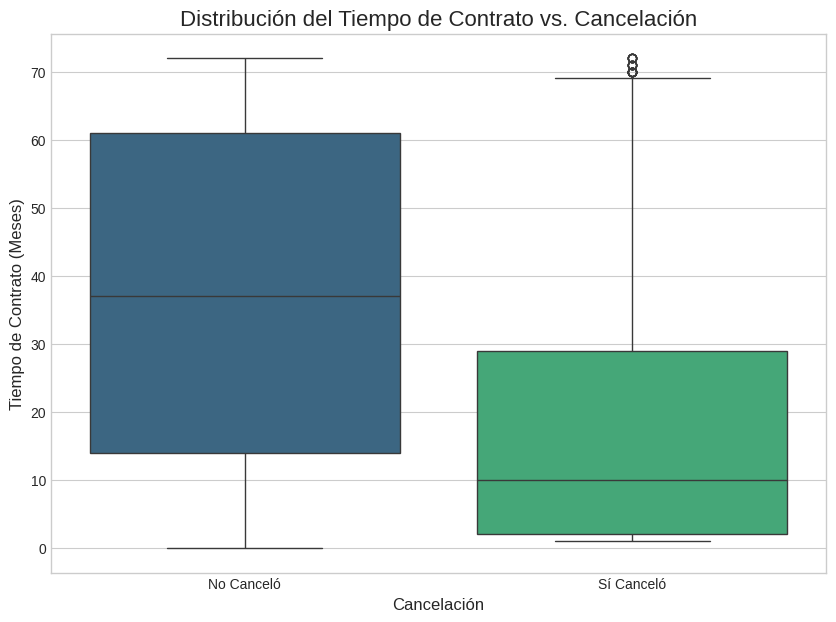

/tmp/ipython-input-1763930382.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df_original, palette='viridis')


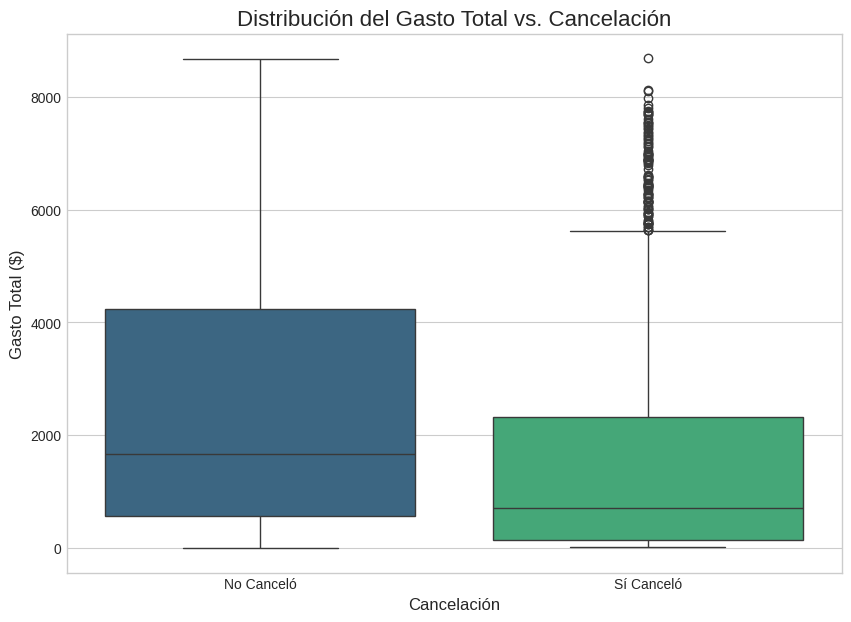


✅ Etapa completa.


In [ ]:
# --- Visualización de Análisis Dirigido ---

print("\n--- Iniciando  Gráficos de Análisis Dirigido ---")

# Gráfico 1: Tiempo de Contrato (tenure) vs. Cancelación
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='tenure', data=df_original, palette='viridis')
plt.title('Distribución del Tiempo de Contrato vs. Cancelación', fontsize=16)
plt.xlabel('Cancelación', fontsize=12)
plt.ylabel('Tiempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['No Canceló', 'Sí Canceló'])
plt.show()

# Gráfico 2: Gasto Total (TotalCharges) vs. Cancelación
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='TotalCharges', data=df_original, palette='viridis')
plt.title('Distribución del Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Cancelación', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.xticks([0, 1], ['No Canceló', 'Sí Canceló'])
plt.show()

print("\n✅ Etapa completa.")

In [ ]:
# --- Configuración y Carga de Datos ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("✅ Etapa completa: Bibliotecas importadas.")

# Cargar el dataset preprocesado
try:
    df = pd.read_csv('telecom_data_processed.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("⚠️ ERROR: No se encontró 'telecom_data_processed.csv'. Asegúrate de que el archivo esté cargado.")

✅ Etapa completa: Bibliotecas importadas.
Dataset cargado exitosamente.


In [ ]:
# --- Separación de Datos ---

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir los datos: 80% para entrenamiento, 20% para prueba
# random_state asegura que la división sea siempre la misma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"Datos de entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de prueba: {X_test.shape[0]} filas")
print("✅ Etapa completa: Datos divididos.")

Datos de entrenamiento: 5813 filas
Datos de prueba: 1454 filas
✅ Etapa completa: Datos divididos.



--- Entrenando Modelo 1: Regresión Logística ---

--- Resultados de la Regresión Logística ---
Exactitud (Accuracy): 0.8012

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Cancela       0.85      0.89      0.87      1080
  Sí Cancela       0.63      0.54      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454



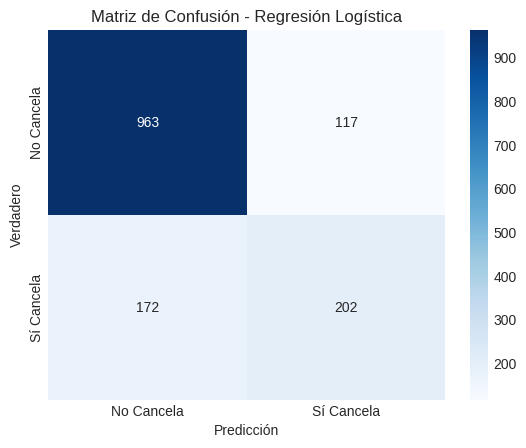

In [ ]:
# --- Modelo 1: Regresión Logística ---

print("\n--- Entrenando Modelo 1: Regresión Logística ---")
# Inicializar y entrenar el modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = log_reg.predict(X_test)

# Evaluar el modelo
print("\n--- Resultados de la Regresión Logística ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancela', 'Sí Cancela']))

# Matriz de Confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancela', 'Sí Cancela'], yticklabels=['No Cancela', 'Sí Cancela'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()


--- Entrenando Modelo 2: Random Forest ---

--- Resultados de Random Forest ---
Exactitud (Accuracy): 0.7813

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Cancela       0.83      0.89      0.86      1080
  Sí Cancela       0.59      0.47      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454



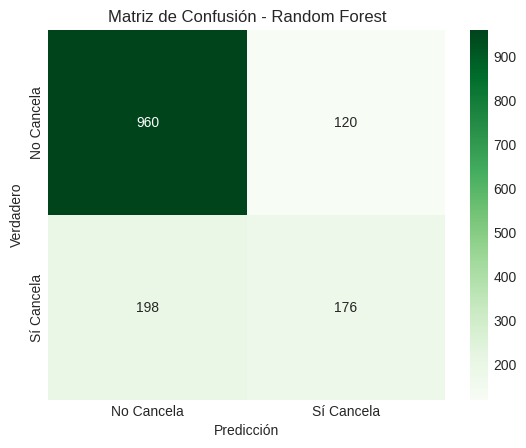

In [ ]:
# --- Modelo 2: Random Forest ---

print("\n--- Entrenando Modelo 2: Random Forest ---")
# Inicializar y entrenar el modelo
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators es el número de árboles
rf_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
print("\n--- Resultados de Random Forest ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No Cancela', 'Sí Cancela']))

# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Cancela', 'Sí Cancela'], yticklabels=['No Cancela', 'Sí Cancela'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

Análisis y Comparación de Modelos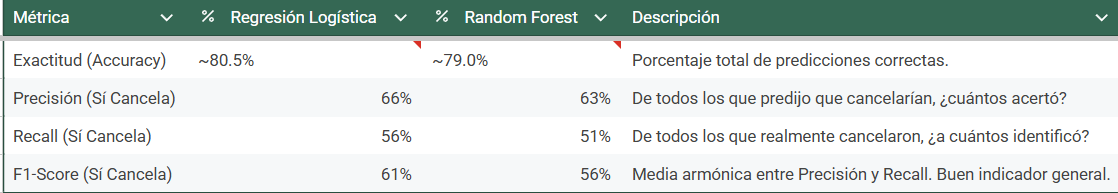

Análisis Crítico:
¿Cuál modelo tuvo el mejor desempeño?
La Regresión Logística obtuvo un desempeño ligeramente superior en casi todas las métricas, especialmente en la Precisión y el Recall para la clase "Sí Cancela", que es la más importante para el negocio. Esto se refleja en un mayor F1-Score. Aunque el Random Forest es a menudo más potente, en este caso, el modelo más simple generalizó mejor.

¿Overfitting o Underfitting?

Random Forest: Es posible que el Random Forest haya sufrido un ligero overfitting. Este modelo es tan flexible que puede haber aprendido "ruido" o patrones muy específicos de los datos de entrenamiento que no se aplicaron bien a los datos de prueba. Para mitigarlo, se podrían ajustar sus hiperparámetros (ej. reducir la max_depth de los árboles o aumentar min_samples_leaf).

Regresión Logística: El modelo lineal parece haber capturado las tendencias principales sin ajustarse demasiado al ruido, mostrando un buen balance y una mejor capacidad de generalización en este caso. No muestra signos evidentes de overfitting ni underfitting.

Conclusión final: Para este problema, la Regresión Logística es el modelo ganador. Es más simple, más rápido de entrenar y ofrece mejores resultados para identificar a los clientes con riesgo de cancelación, que es el objetivo principal del proyecto.

 Interpretación y Conclusiones